Multiple Comparisons Tutorial & Exercises

In [2]:
import matplotlib.pyplot as plt
import numpy as np

Text(0, 0.5, 'Perror')

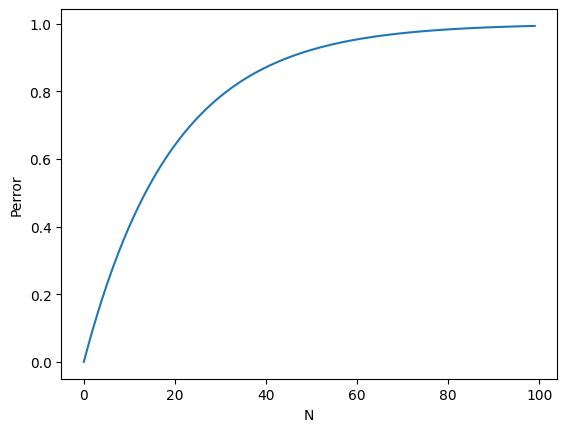

In [3]:
alpha = 0.05
N = np.arange(0,100)
plt.plot(N, 1-(1-alpha)**N)
plt.xlabel('N')
plt.ylabel('Perror')

Exercises:

First, simulating multiple t-tests

Number of p < 0.05: 39 / 1000
Proportion p < 0.05: 0.039 (expected ≈ 0.05)
First 10 p-values: [0.5922 0.3643 0.335  0.2308 0.4567 0.8669 0.4379 0.091  0.7368 0.1089]


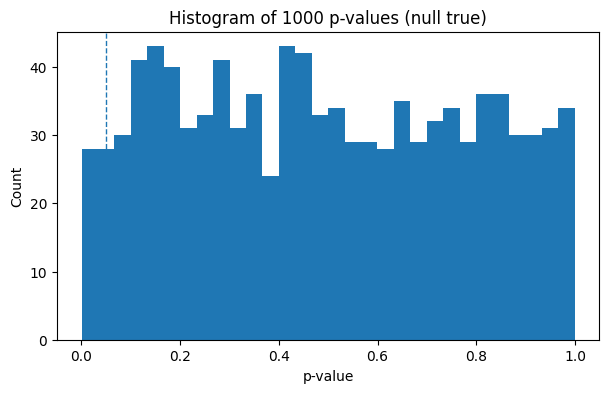

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# ----------------------
# Simulation parameters
# ----------------------
n_sim = 1000          # number of simulated t-tests
n_per_group = 20      # sample size per group in each test
mu = 0.0              # population mean for both groups (null is true)
sigma = 1.0           # population standard deviation for both groups
alpha = 0.05          # significance threshold
rng = np.random.default_rng(42)  # reproducible random numbers

# Container for p-values
p_vals = np.empty(n_sim)

# Run the simulations
for i in range(n_sim):
    group1 = rng.normal(loc=mu, scale=sigma, size=n_per_group)
    group2 = rng.normal(loc=mu, scale=sigma, size=n_per_group)
    t_stat, p_value = stats.ttest_ind(group1, group2, equal_var=True)
    p_vals[i] = p_value

# Summary: proportion of "significant" tests at alpha
count_sig = np.sum(p_vals < alpha)
prop_sig = count_sig / n_sim
print(f"Number of p < {alpha}: {count_sig} / {n_sim}")
print(f"Proportion p < {alpha}: {prop_sig:.3f} (expected ≈ {alpha})")

# Optional: show a few p-values
print("First 10 p-values:", np.round(p_vals[:10], 4))

# Plot histogram of p-values
plt.figure(figsize=(7,4))
plt.hist(p_vals, bins=30)
plt.xlabel("p-value")
plt.ylabel("Count")
plt.title(f"Histogram of {n_sim} p-values (null true)")
plt.axvline(alpha, linestyle="--", linewidth=1)  # mark alpha on the plot
plt.show()


Bonferroni Correction

In [5]:
# ----------------------
# Bonferroni correction
# ----------------------

alpha = 0.05
n_tests = len(p_vals)

# Adjusted alpha threshold
alpha_bonf = alpha / n_tests
print(f"Bonferroni-adjusted alpha = {alpha_bonf:.6f}")

# Which tests are significant after correction?
sig_bonf = p_vals < alpha_bonf
count_sig_bonf = np.sum(sig_bonf)

print(f"Number of significant tests (Bonferroni): {count_sig_bonf} / {n_tests}")


Bonferroni-adjusted alpha = 0.000050
Number of significant tests (Bonferroni): 0 / 1000


Benjamini-Hochberg Correction

In [7]:
# ----------------------
# Benjamini-Hochberg correction
# ----------------------

Q = 0.05  # desired false discovery rate (FDR)

# Step 1: rank p-values in ascending order
sorted_idx = np.argsort(p_vals)
sorted_p = p_vals[sorted_idx]

# Step 2: compute critical values
n_tests = len(p_vals)
crit_values = (np.arange(1, n_tests + 1) / n_tests) * Q

# Step 3: find largest p-value less than its critical value
below = sorted_p <= crit_values
if np.any(below):
    max_idx = np.max(np.where(below))
    cutoff_p = sorted_p[max_idx]
else:
    cutoff_p = 0

print(f"Benjamini-Hochberg cutoff p-value = {cutoff_p:.6f}")

# Step 4: mark significant tests
sig_bh = p_vals <= cutoff_p
count_sig_bh = np.sum(sig_bh)

print(f"Number of significant tests (BH): {count_sig_bh} / {n_tests}")


Benjamini-Hochberg cutoff p-value = 0.000000
Number of significant tests (BH): 0 / 1000


Now with differeing means... sample 1 mu = 1 & sample 2 mu = 2

Number of p < 0.05: 863 / 1000
Proportion p < 0.05: 0.863


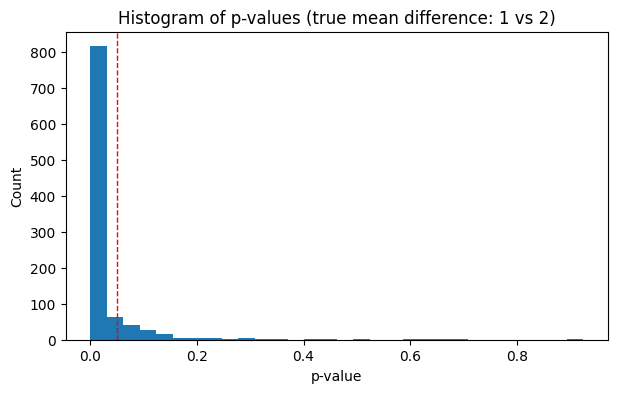

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# ----------------------
# Simulation parameters
# ----------------------
n_sim = 1000          # number of simulated t-tests
n_per_group = 20      # sample size per group
mu1 = 1.0             # mean of group 1
mu2 = 2.0             # mean of group 2 (true difference!)
sigma = 1.0           # standard deviation
alpha = 0.05          # significance threshold
rng = np.random.default_rng(42)

# Collect p-values
p_vals = np.empty(n_sim)

for i in range(n_sim):
    group1 = rng.normal(loc=mu1, scale=sigma, size=n_per_group)
    group2 = rng.normal(loc=mu2, scale=sigma, size=n_per_group)
    _, p_value = stats.ttest_ind(group1, group2, equal_var=True)
    p_vals[i] = p_value

# Quick summary
count_sig = np.sum(p_vals < alpha)
prop_sig = count_sig / n_sim
print(f"Number of p < {alpha}: {count_sig} / {n_sim}")
print(f"Proportion p < {alpha}: {prop_sig:.3f}")

# Plot histogram of p-values
plt.figure(figsize=(7,4))
plt.hist(p_vals, bins=30)
plt.xlabel("p-value")
plt.ylabel("Count")
plt.title("Histogram of p-values (true mean difference: 1 vs 2)")
plt.axvline(alpha, linestyle="--", linewidth=1, color="red")
plt.show()


In [9]:
# ----------------------
# Bonferroni correction
# ----------------------
n_tests = len(p_vals)
alpha_bonf = alpha / n_tests
sig_bonf = p_vals < alpha_bonf
count_sig_bonf = np.sum(sig_bonf)

print(f"Bonferroni-adjusted alpha = {alpha_bonf:.6f}")
print(f"Number of significant tests (Bonferroni): {count_sig_bonf} / {n_tests}")

Bonferroni-adjusted alpha = 0.000050
Number of significant tests (Bonferroni): 116 / 1000


In [10]:
# ----------------------
# Benjamini–Hochberg correction
# ----------------------
Q = 0.05  # false discovery rate
sorted_idx = np.argsort(p_vals)
sorted_p = p_vals[sorted_idx]

n_tests = len(p_vals)
crit_values = (np.arange(1, n_tests+1) / n_tests) * Q

below = sorted_p <= crit_values
if np.any(below):
    max_idx = np.max(np.where(below))
    cutoff_p = sorted_p[max_idx]
else:
    cutoff_p = 0

sig_bh = p_vals <= cutoff_p
count_sig_bh = np.sum(sig_bh)

print(f"Benjamini–Hochberg cutoff p-value = {cutoff_p:.6f}")
print(f"Number of significant tests (BH): {count_sig_bh} / {n_tests}")


Benjamini–Hochberg cutoff p-value = 0.041267
Number of significant tests (BH): 853 / 1000
